## Import Libraries

In [1]:
import pandas as pd
import sweetviz as sv
from pandas_profiling import ProfileReport

## Exploratory data analysis wtih Sweetviz

In [2]:
data = pd.read_csv('delaware_anomaly.csv')

In [6]:
data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44


In [3]:
anomaly_report2 = sv.analyze(data)
anomaly_report2.show_html('Anomaly_Report2.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Anomaly_Report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Exploratory Data Analysis with Pandas Profiling

In [6]:
anomaly_report3 = ProfileReport(data, title='Anomaly_Report_Pandas')

# Save the html report on results directory
anomaly_report3.to_file("./Anomaly_Report_Pandas.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.dtypes

FISCAL_YEAR          int64
FISCAL_PERIOD        int64
DEPT_NAME           object
DIV_NAME            object
MERCHANT            object
CAT_DESCR           object
TRANS_DT            object
MERCHANDISE_AMT    float64
dtype: object

In [8]:
from pycaret.anomaly import *
s = setup(data, session_id = 123,
          ignore_features = ['CAT_DESCR','DEPT_NAME'], high_cardinality_features= ['MERCHANT'],
          numeric_features = ['FISCAL_YEAR', 'FISCAL_PERIOD' ])

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(15156, 52)"
9,CPU Jobs,-1


In [9]:
get_config('X').columns

Index(['FISCAL_YEAR', 'FISCAL_PERIOD', 'MERCHANT', 'MERCHANDISE_AMT',
       'DIV_NAME_ADVISORY COUNCIL', 'DIV_NAME_Academic Support',
       'DIV_NAME_Adult Education and Work Force',
       'DIV_NAME_DEPARTMENT OF EDUCATION', 'DIV_NAME_DRIVER TRAINING',
       'DIV_NAME_Department of Education', 'DIV_NAME_Driver Training',
       'DIV_NAME_E Education Block Grants', 'DIV_NAME_E Transportation',
       'DIV_NAME_EDUCATION BLOCK GRANTS', 'DIV_NAME_Education Block Grants',
       'DIV_NAME_Educator Support', 'DIV_NAME_OTHER ITEMS',
       'DIV_NAME_Office of Early Learning', 'DIV_NAME_Office of the Secretary',
       'DIV_NAME_Operations Support', 'DIV_NAME_Other Items',
       'DIV_NAME_Professional Standards Board',
       'DIV_NAME_Public School Transportation',
       'DIV_NAME_SPECIAL NEEDS PROGRAMS', 'DIV_NAME_Special Needs Programs',
       'DIV_NAME_State Board of Education', 'DIV_NAME_Student Support',
       'DIV_NAME_TRANSPORTATION', 'DIV_NAME_Transportation',
       'TRANS_D

In [10]:
iforest = create_model('iforest')

In [11]:
r = assign_model(iforest)
r.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50,0,-0.054562
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31,0,-0.064519
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61,0,-0.064519
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39,0,-0.064519
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44,0,-0.064519


In [12]:
r['Anomaly'].value_counts()

0    14399
1      757
Name: Anomaly, dtype: int64

<AxesSubplot:>

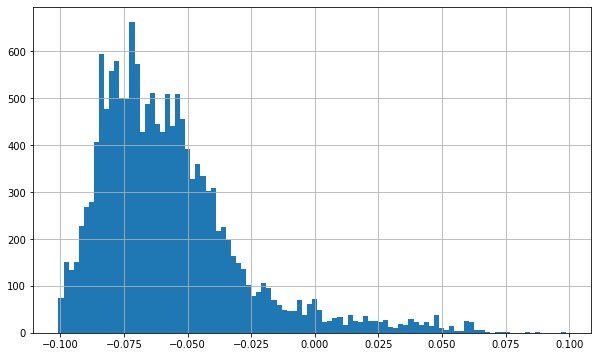

In [13]:
r['Anomaly_Score'].hist(bins=100, figsize=(10,6))